In [1]:
import numpy as np
import scipy as sp
import sys
sys.path.append("../src/")

import matplotlib.pyplot as plt
%matplotlib inline

import my_modes as my

#import seaborn as sns
#sns.set(style="darkgrid")
#sns.set(style="whitegrid")


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 14 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 14 days


In [2]:
plt.rcParams.update({'font.size': 12
    , 'legend.markerscale': 1., 'axes.titlesize': 12, 'axes.labelsize' : 12,
      'legend.fontsize' : 10,'legend.handlelength': 3})

plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)

In [3]:
color2 = '#6495ed'
color1 = '#ff6347'
color5 = '#8470ff'
color3 = '#3cb371'
color4 = '#ffd700'
color6 = '#ba55d3'
lw1=1
aph=.85

## load cdrake stratification

In [4]:
cdrake=np.load('N2_CDRAKE.npz')

## parameter for spectrum

In [5]:
# parameters
dx = 5.
L = 800.    # length of array [km]
dk = 1./L
kNy = 1./(2.*dx)

kappa = np.arange(dk,kNy,dk)
E = 1./(kappa**(5/3.))/5.e4

## SQG spectra 

In [6]:
# spectra depth dependence
N2,lat,p=(cdrake['N2n']+cdrake['N2s'])/2.,(cdrake['latn']+cdrake['lats'])/2.,cdrake['pN2']

sqgz,sqgzs,sqgzn=np.zeros((p.size,kappa.size)),np.zeros((p.size,kappa.size)),np.zeros((p.size,kappa.size))

for i in range(kappa.size):
    sqgz[:,i]=my.sqgz(N2, p, lat, (2.*np.pi*kappa[i])/1.e3,norm=True)
    sqgzs[:,i]=my.sqgz(cdrake['N2s'], p, cdrake['lats'], (2.*np.pi*kappa[i])/1.e3,norm=True)
    sqgzn[:,i]=my.sqgz(cdrake['N2n'], p, cdrake['latn'], (2.*np.pi*kappa[i])/1.e3,norm=True)

# SQG KE spectra depth dependence
Ez = (sqgz**2)*(np.repeat(E,p.size).reshape(kappa.size,p.size)).T
Ezs = (sqgzs**2)*(np.repeat(E,p.size).reshape(kappa.size,p.size)).T
Ezn = (sqgzn**2)*(np.repeat(E,p.size).reshape(kappa.size,p.size)).T

In [7]:
# ref slope
ks = np.array([1.e-3,1.])
Es = 1.e-5/(ks**(5/3.))
Es3 = 1.e-7/(ks**(3.))

# three slabs 
fs1= ((p>=26)&(p<=50))
fs2= ((p>=58)&(p<=98))
fs3= ((p>=106)&(p<=202))

## Plot $N^2(z)$

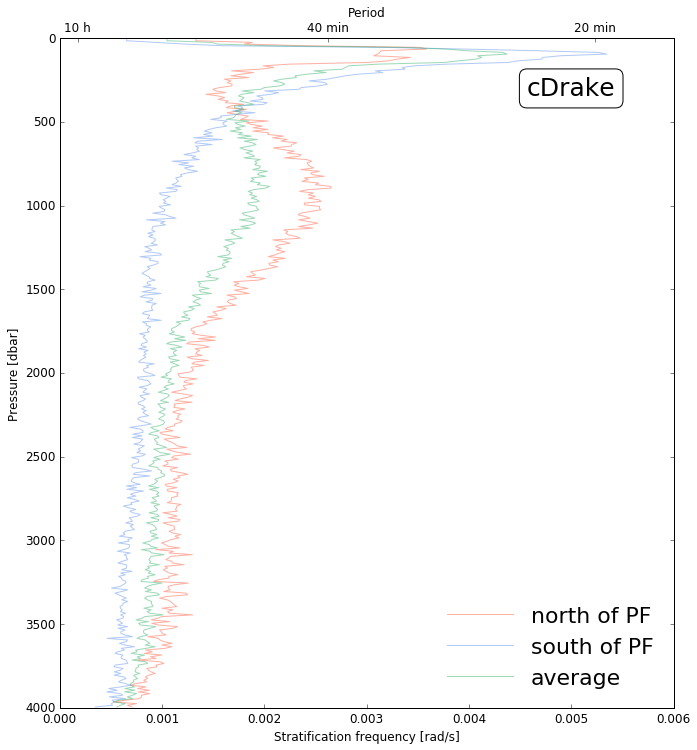

In [8]:
aph1 = .5

fig = plt.figure(facecolor='w', figsize=(11.,12.))
ax1 = fig.add_subplot(111)

ax1.plot(np.sqrt(cdrake['N2n']),p,color=color1,linewidth=lw1,\
         alpha=aph1,label='north of PF')
ax1.plot(np.sqrt(cdrake['N2s']),p,color=color2,linewidth=lw1,\
         alpha=aph1,label='south of PF')
ax1.plot(np.sqrt(N2),p,color=color3,linewidth=lw1,alpha=aph1,\
         label='average')

plt.xlabel(u'Stratification frequency [rad/s]')
plt.ylabel(u'Pressure [dbar]')

lg = plt.legend(loc=4,title= u'', prop={'size':22}, numpoints=1)

plt.text(0.005, 300., "cDrake", size=25, rotation=0.,
             ha="center", va="center",
             bbox = dict(boxstyle="round",ec='k',fc='w'))
plt.ylim(4000,0)

ax2 = ax1.twiny() # add second x-axis (wavelength)
ax2.set_xlim(ax1.axis()[0], ax1.axis()[1])
Tp = np.array([10*60.,40.,20.])  
ax2.set_xticks((2.*np.pi)/Tp/60)
ax2.set_xticklabels(['10 h', '40 min', '20 min'])
plt.xlabel('Period')
tit = 'figs/n2_cdrake'
plt.savefig(tit,bbox_inches='tight')

# SQG spectrum depth dependence

In [9]:
def add_second_axis(ax1):
    """ Add a x-axis at the top of the spectra figures """
    ax2 = ax1.twiny() 
    ax2.set_xscale('log')
    ax2.set_xlim(ax1.axis()[0], ax1.axis()[1])
    kp = 1./np.array([500.,200.,100.,40.,20.,10.,5.])
    lp=np.array([500,200,100,40,20,10,5])
    ax2.set_xticks(kp)
    ax2.set_xticklabels(lp)
    plt.xlabel('Wavelength [km]')

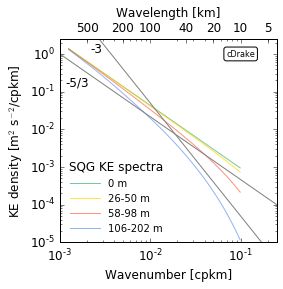

In [10]:
fig = plt.figure(figsize=(8.27/2-.25,11.69/3-.25))
ax1 = fig.add_subplot(111)
aph1=.7

ax1.loglog(kappa,Ez[0,:],color=color3,linewidth=lw1,
        alpha=aph1,label='0 m')
ax1.loglog(kappa,Ez[fs1,:].mean(axis=0),color=color4,linewidth=lw1,
        alpha=aph1,label='26-50 m')
ax1.loglog(kappa,Ez[fs2,:].mean(axis=0),color=color1,linewidth=lw1,
        alpha=aph1,label='58-98 m')
ax1.loglog(kappa,Ez[fs3,:].mean(axis=0),color=color2,linewidth=lw1,
        alpha=aph1,label='106-202 m')

ax1.loglog(ks,Es,'-', color='0.5',linewidth=1.)
ax1.loglog(ks,Es3/2.,'-', color='0.5',linewidth=1.)

plt.text(0.0014254728311770823/1.25, 0.21255491432017771/1.5,u'-5/3')
plt.text(0.0041378007703454742/1.9, 1.1089697745069138,u'-3')

plt.xlabel('Wavenumber [cpkm]')
plt.ylabel(u'KE density [m$^{2}$ s$^{-2}$/cpkm]')

lg = plt.legend(loc=3,title= u'SQG KE spectra', numpoints=1)
lg.draw_frame(False)

plt.axis((1./1.e3,1./4.,1./1.e5,2.5e0))

plt.text(1./10, 1., "cDrake", size=8, rotation=0.,
         ha="center", va="center",
         bbox = dict(boxstyle="round",ec='k',fc='w'))

add_second_axis(ax1)
tit = 'figs/sqg_ke_spec_mean'
plt.savefig(tit,bbox_inches='tight')
plt.savefig(tit+'.eps',bbox_inches='tight')
plt.savefig(tit+'.pdf',bbox_inches='tight')